In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Conv2D, Conv2DTranspose, LeakyReLU, BatchNormalization, Dropout, MaxPool2D, GlobalAveragePooling2D, Reshape
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [119]:
dataset = np.concatenate((X_train, X_test))

In [120]:
dataset = dataset/255.0

In [121]:
dataset = dataset.reshape((dataset.shape[0],28, 28, 1 ))


In [98]:
def Discriminator():
  input = Input(shape = (28,28,1))
  x = Conv2D(128, 3, padding='same')(input)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)
  x = Dropout(0.3)(x)
  x = MaxPool2D()(x)

  x = Conv2D(64, 3, padding='same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)
  x = Dropout(0.3)(x)
  

  x = GlobalAveragePooling2D()(x)
  disc = Dense(1, activation='sigmoid')(x)

  discriminator = tf.keras.models.Model(input, disc)
  discriminator.compile(loss = 'binary_crossentropy', optimizer = 'adam')

  return discriminator

In [99]:
disc = Discriminator()


In [100]:
disc.summary()

Model: "model_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
batch_normalization_46 (Batc (None, 28, 28, 128)       512       
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 28, 28, 128)       0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 64)        737

In [77]:
def Genereator():
  input = Input((100,))

  x = Dense(7*7*256)(input)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)
  x = Dropout(0.3)(x)

  x = Reshape((7,7,256))(x)

  x = Conv2DTranspose(128, kernel_size = 3, strides = (2,2), padding='same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)

  x = Conv2DTranspose(64, kernel_size = 3, strides = (2,2), padding='same')(x)
  x = BatchNormalization()(x)
  x = LeakyReLU()(x)
  
  gen = Conv2DTranspose(1, 3, strides=(1,1), padding = 'same', activation='sigmoid')(x)

  generator = tf.keras.models.Model(input, gen)

  generator.compile(loss = 'binary_crossentropy', optimizer = 'adam')

  return generator

In [78]:
gen = Genereator()
gen.summary()

Model: "model_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 100)]             0         
_________________________________________________________________
dense_20 (Dense)             (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_43 (Batc (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_43 (LeakyReLU)   (None, 12544)             0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 12544)             0         
_________________________________________________________________
reshape_13 (Reshape)         (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_23 (Conv2DT (None, 14, 14, 128)       295

In [ ]:
noise = tf.random.normal([1,100])
generated_image = gen.predict(noise)

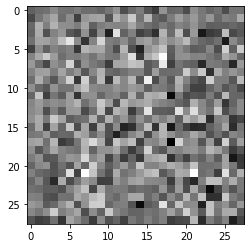

In [87]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [119]:
generated_image.shape

(1, 28, 28, 1)

In [103]:
disc.predict(dataset[10000].reshape(1,28,28,1))

array([[0.5074193]], dtype=float32)

In [105]:
  def DCGAN(generator, discriminator):
    model = tf.keras.models.Sequential()

    discriminator.trainable = False

    model.add(generator)
    model.add(discriminator)

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

    return model

In [107]:
dcgan = DCGAN(gen, disc)

In [111]:
dcgan.predict(noise)

array([[0.5140901]], dtype=float32)

In [18]:
from tqdm import tqdm


In [ ]:
for batch in tqdm(range(50)):    # 50 is no of epochs
  c = 0
  for i in range(300):
    noise = tf.random.normal([100, 100]).numpy()   # 100 is the no of samples per batch
    fake_faces = gen.predict(noise)

    real_faces = dataset[c:c+100]
    batch = np.concatenate((real_faces, fake_faces))

    batch_size = len(fake_faces)
    y = np.concatenate((np.ones(batch_size), np.zeros(batch_size)))

    #train the discriminator
    history = disc.train_on_batch(batch, y)

    #train the generator
    dcgan.train_on_batch(noise, (np.ones(batch_size)))
    c += 100
  

In [152]:
noise = tf.random.normal([1,100])
generated_image = gen.predict(noise)

In [ ]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [1]:
##############################################################################################################################################

#Let's try another approach

In [244]:
(X_train, y_train) , (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [264]:
dataset = np.concatenate((X_train, X_test))

In [265]:
dataset = dataset/255.0

In [266]:
dataset = dataset.reshape((dataset.shape[0],28, 28, 1 ))


In [267]:
dataset.shape

(70000, 28, 28, 1)

In [250]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))
    model.add(layers.BatchNormalization())

    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation = 'sigmoid')) ###################  tanh 
    model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(momentum = 0.5))
    return model

In [251]:
disc = make_discriminator_model()
disc.summary()

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 14, 14, 64)        1664      
_________________________________________________________________
batch_normalization_37 (Batc (None, 14, 14, 64)        256       
_________________________________________________________________
leaky_re_lu_45 (LeakyReLU)   (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 7, 7, 128)         204928    
_________________________________________________________________
leaky_re_lu_46 (LeakyReLU)   (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 7, 7, 128)       

In [253]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=True, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256) # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=True))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=True))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=True, activation='sigmoid'))
    assert model.output_shape == (None, 28, 28, 1)

    model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.SGD(momentum = 0.5)) 

    return model

In [254]:
gen = make_generator_model()
gen.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 12544)             1266944   
_________________________________________________________________
batch_normalization_39 (Batc (None, 12544)             50176     
_________________________________________________________________
leaky_re_lu_47 (LeakyReLU)   (None, 12544)             0         
_________________________________________________________________
reshape_9 (Reshape)          (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_transpose_25 (Conv2DT (None, 7, 7, 128)         819328    
_________________________________________________________________
batch_normalization_40 (Batc (None, 7, 7, 128)         512       
_________________________________________________________________
leaky_re_lu_48 (LeakyReLU)   (None, 7, 7, 128)       

In [255]:
  def DCGAN(generator, discriminator):
    model = tf.keras.models.Sequential()

    discriminator.trainable = False

    model.add(generator)
    model.add(discriminator)

    model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

    return model

In [256]:
noise = tf.random.normal([1,100])
generated_image = gen.predict(noise)

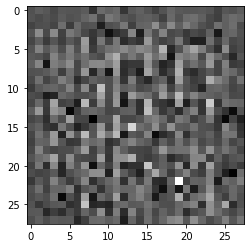

In [257]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [258]:
disc.predict(dataset[10].reshape(1,28,28,1))

array([[0.4882391]], dtype=float32)

In [259]:
dcgan = DCGAN(gen, disc)

In [ ]:
for batch in tqdm(range(100)):    # 50 is nom of epochs
  d = 0
  for i in range(300):   #300 means that the training process will happen on the 1st 30000 mnist sample, if you to train on the whole dataset put 700 istead of 300
    noise = tf.random.normal([100, 100]).numpy()   # 100 is the nom of samples per batch
    fake_faces = gen.predict(noise)

    real_faces = dataset[d : d + 100]
    batch = np.concatenate((real_faces, fake_faces))

    batch_size = len(fake_faces)
    y = np.concatenate((np.ones(batch_size), np.zeros(batch_size)))

    #train the discriminator
    history = disc.train_on_batch(batch, y)

    #train the generator
    dcgan.train_on_batch(noise, (np.ones(batch_size)))

    d += 100
  

In [320]:
noise = tf.random.normal([1,100])
generated_image = gen.predict(noise)

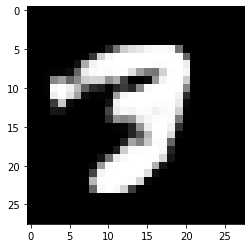

In [321]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [270]:
dataset[0:10].shape

(10, 28, 28, 1)

# Saving tge generator

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/My Drive/Kaggle'

In [303]:
gen.save('mnist_generator.h5')

In [304]:
disc.save('mnist_discriminator.h5')

In [305]:
dcgan.save('my_mnist_dcgan.h5')

In [7]:
%cd /content/gdrive/My Drive/Colab Notebooks/Epsilon notebooks/My DCGAN

/content/gdrive/My Drive/Colab Notebooks/Epsilon notebooks/My DCGAN


In [302]:
pwd

'/content/gdrive/My Drive/Colab Notebooks/Epsilon notebooks'

In [323]:
%cd /content/gdrive/My Drive/Colab Notebooks/Epsilon notebooks/My DCGAN

/content/gdrive/My Drive/Colab Notebooks/Epsilon notebooks/My DCGAN


In [ ]:
from tensorflow.keras.models import load_model
gen = load_model('mnist_generator.h5')

In [ ]:
noise = tf.random.normal([1,100])
generated_image = gen.predict(noise)

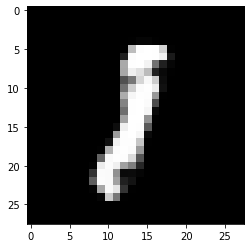

In [352]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')